In [204]:
' Import all required python libraries'
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import re
import string
import os
import emoji
from pprint import pprint
import collections

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

import gensim

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')

np.random.seed(37)
import datetime

In [205]:
ls

exercise1.pdf   hashtag.json
gio_tweets.csv    process_and_plot_gio_tweets.ipynb


In [206]:
'Read the CSV file and parse its input. '
df = pd.read_csv('gio_tweets.csv', delimiter = ',')
df.head()


,timestamp,tweet,retweet_count,like_count
0,Mon Feb 11 19:02:15 +0000 2019,With @bladeandsoul data to a new churn prediction for marketing and business planning. Read more about this in our latest @IEEETxnOnGames publication. #churnprediction #marketing #datamining #gameindustry #IEEE #bladeandsoul https://t.co/kLWfV8kQ7b https://t.co/bTpmxbbBzX,1,4
1,Tue Jan 29 09:31:20 +0000 2019,Good morning @learntec_news! Our talk is at 12:15 in room 8/9. #LearningAnalytics #Education #Learntec https://t.co/Q98qmO1Snv,0,5
2,Mon Jan 28 07:55:30 +0000 2019,Meet us tomorrow at @learntec_news and learn more about predicting learners' behavior and adapting content for students:\nhttps://t.co/895WHa5WcE #education #LearningAnalytics #MachineLearning @envisageh2020,1,3
3,Wed Jan 23 20:12:35 +0000 2019,RT @CologneAIML: Thanks to all attendees of last night's #CAIML #Meetup 🙌 Also a big thank you to our great speakers Alex and @luckluckierl…,6,0
4,Fri Jan 04 17:47:55 +0000 2019,"Within the @envisageh2020 project, we used machine learning, developed for digital games, to make education more efficient and to integrate dynamic difficulty adjustment in virtual labs. #LearningAnalytics #Education #MachineLearning #H2020 https://t.co/0wqaWedPcZ https://t.co/18k5042wN6",2,6


In [ ]:
import time
from pandas import Series
import datetime

# load data
df = pd.read_csv('gio_tweets.csv',low_memory=False, parse_dates= ['timestamp'])
df = df.set_index('timestamp')
df1 = pd.DataFrame()
'''Resample data for every 1 minute'''
df1['States'] = df['tweet'].resample('60s').count()
df1.plot(figsize=(30,10))

MemoryError: 

Error in callback <function post_execute at 0x7fded14d9e60> (for post_execute):


MemoryError: 

MemoryError: 

In [184]:
df = pd.read_csv('gio_tweets.csv', delimiter = ',')

df = df[['tweet', 'retweet_count']]

In [185]:
class TextCounts(BaseEstimator, TransformerMixin):
    
    def count_regex(self, pattern, tweet):
        return len(re.findall(pattern, tweet))
    
    def fit(self, X, y=None, **fit_params):
        # fit method is used when specific operations need to be done on the train data, but not on the test data
        return self
    
    def transform(self, X, **transform_params):
        count_words = X.apply(lambda x: self.count_regex(r'\w+', x)) 
        count_mentions = X.apply(lambda x: self.count_regex(r'@\w+', x))
        count_hashtags = X.apply(lambda x: self.count_regex(r'#\w+', x))
        count_capital_words = X.apply(lambda x: self.count_regex(r'\b[A-Z]{2,}\b', x))
        count_excl_quest_marks = X.apply(lambda x: self.count_regex(r'!|\?', x))
        count_urls = X.apply(lambda x: self.count_regex(r'http.?://[^\s]+[\s]?', x))
        # We will replace the emoji symbols with a description, which makes using a regex for counting easier
        # Moreover, it will result in having more words in the tweet
        count_emojis = X.apply(lambda x: emoji.demojize(x)).apply(lambda x: self.count_regex(r':[a-z_&]+:', x))
        
        df = pd.DataFrame({'count_words': count_words
                           , 'count_mentions': count_mentions
                           , 'count_hashtags': count_hashtags
                           , 'count_capital_words': count_capital_words
                           , 'count_excl_quest_marks': count_excl_quest_marks
                           , 'count_urls': count_urls
                           , 'count_emojis': count_emojis
                          })
        
        return df
tc = TextCounts()
df_eda = tc.fit_transform(df.tweet)
df_eda['retweet_count'] = df.retweet_count
df_eda['count_hashtags']

merged = pd.concat([df['tweet'], df_eda['count_hashtags']], axis = "columns")
merged.head()

#merged.to_json(r'hashtag.json')

,tweet,count_hashtags
0,With @bladeandsoul data to a new churn prediction for marketing and business planning. Read more about this in our latest @IEEETxnOnGames publication. #churnprediction #marketing #datamining #gameindustry #IEEE #bladeandsoul https://t.co/kLWfV8kQ7b https://t.co/bTpmxbbBzX,6
1,Good morning @learntec_news! Our talk is at 12:15 in room 8/9. #LearningAnalytics #Education #Learntec https://t.co/Q98qmO1Snv,3
2,Meet us tomorrow at @learntec_news and learn more about predicting learners' behavior and adapting content for students:\nhttps://t.co/895WHa5WcE #education #LearningAnalytics #MachineLearning @envisageh2020,3
3,RT @CologneAIML: Thanks to all attendees of last night's #CAIML #Meetup 🙌 Also a big thank you to our great speakers Alex and @luckluckierl…,2
4,"Within the @envisageh2020 project, we used machine learning, developed for digital games, to make education more efficient and to integrate dynamic difficulty adjustment in virtual labs. #LearningAnalytics #Education #MachineLearning #H2020 https://t.co/0wqaWedPcZ https://t.co/18k5042wN6",4


In [ ]:
def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
.apply(self.remove_mentions)

In [186]:
class CleanText(BaseEstimator, TransformerMixin):
    
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)

    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word.decode('utf-8')) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X

In [189]:
import sys

ct = CleanText()
sr_clean = ct.fit_transform(df.tweet)
sr_clean.sample(2)

281    app retent crisi address person notif marketingland leanplum market
119    ai creat christma carol listen via theavclub                       
Name: tweet, dtype: object

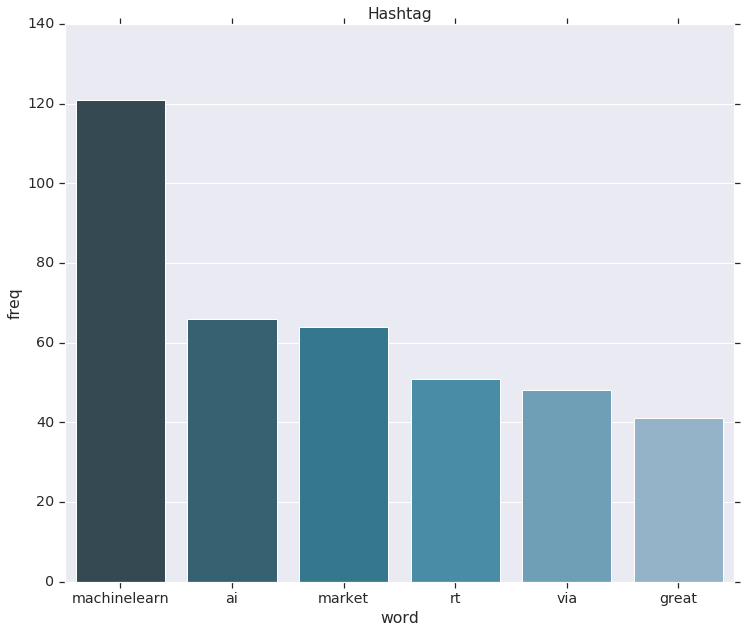

In [201]:
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(6), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.title('Hashtag')
plt.show();

In [199]:
len(word_counter)
#word_counter

1222

In [155]:
'Read the CSV file and parse its input. '
df_1 = pd.read_csv('gio_tweets.csv', delimiter = ',')


#Count the occurrences of each hashtag

count = []
hashtags = []

for i in range(399):
    x = re.findall(r'#\w+',df_1['tweet'][i])
    hashtags.append(x)
    count.append(len(hashtags))
    
data = pd.DataFrame()

xe = []
for i in range(399):
    xe.append(hashtags[i])



pd.DataFrame([xe])

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
0,"[#churnprediction, #marketing, #datamining, #gameindustry, #IEEE, #bladeandsoul]","[#LearningAnalytics, #Education, #Learntec]","[#education, #LearningAnalytics, #MachineLearning]","[#CAIML, #Meetup]","[#LearningAnalytics, #Education, #MachineLearning, #H2020]","[#Cologne, #AI, #MachineLearning, #Meetup, #AI, #Startups]",[],[],"[#h2020, #MachineLearning, #AI, #Education, #Analytics]","[#CAIML, #Meetup]",...,[],"[#machinelearning, #API, #churners]","[#retention, #growth]",[#mobilegames],"[#growth, #retention, #churn, #machinelearning]",[#gamedev],[],"[#awsug, #Koeln]",[#TOA15],"[#AWS, #Summit, #Berlin]"


In [179]:
# create a dataset
raw_data = {'tags': xe}
df_3 = pd.DataFrame(raw_data, columns = ['tags'])

# view the dataset
df_3


,tags
0,"[#churnprediction, #marketing, #datamining, #gameindustry, #IEEE, #bladeandsoul]"
1,"[#LearningAnalytics, #Education, #Learntec]"
2,"[#education, #LearningAnalytics, #MachineLearning]"
3,"[#CAIML, #Meetup]"
4,"[#LearningAnalytics, #Education, #MachineLearning, #H2020]"
5,"[#Cologne, #AI, #MachineLearning, #Meetup, #AI, #Startups]"
6,[]
7,[]
8,"[#h2020, #MachineLearning, #AI, #Education, #Analytics]"
9,"[#CAIML, #Meetup]"


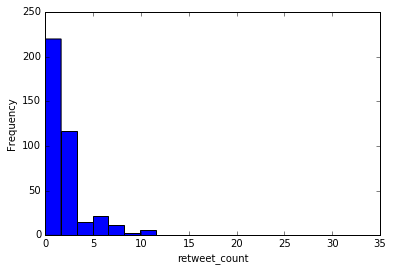

In [158]:
plt.figure()
df['like_count'].plot.hist(bins=20)
plt.xlabel('retweet_count')

plt.show()